In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = '../data/subway_df_cleaned.csv'
df = pd.read_csv(data,low_memory=False)
df

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,latitude,longitude,Georeference,ridership,weekend
0,2023-01-01 14:00:00,staten_island_railway,501,St George (SIR),Staten Island,40.643750,-74.073650,POINT (-74.07365 40.64375),109,1
1,2023-01-01 14:00:00,staten_island_railway,502,Tompkinsville (SIR),Staten Island,40.636948,-74.074840,POINT (-74.07484 40.636948),11,1
2,2023-01-01 14:00:00,subway,1,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.912030,POINT (-73.91203 40.775036),321,1
3,2023-01-01 14:00:00,subway,10,"49 St (N,R,W)",Manhattan,40.759900,-73.984140,POINT (-73.98414 40.7599),604,1
4,2023-01-01 14:00:00,subway,100,"Hewes St (M,J)",Brooklyn,40.706870,-73.953430,POINT (-73.95343 40.70687),67,1
...,...,...,...,...,...,...,...,...,...,...
6825472,2024-10-27 23:00:00,subway,97,"Myrtle Av (M,J,Z)",Brooklyn,40.697210,-73.935650,POINT (-73.93565 40.69721),68,1
6825473,2024-10-27 23:00:00,subway,98,"Flushing Av (M,J)",Brooklyn,40.700260,-73.941124,POINT (-73.941124 40.70026),42,1
6825474,2024-10-27 23:00:00,subway,99,"Lorimer St (M,J)",Brooklyn,40.703870,-73.947410,POINT (-73.94741 40.70387),24,1
6825475,2024-10-27 23:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,40.761337,-73.964160,POINT (-73.96416 40.761337),52,1


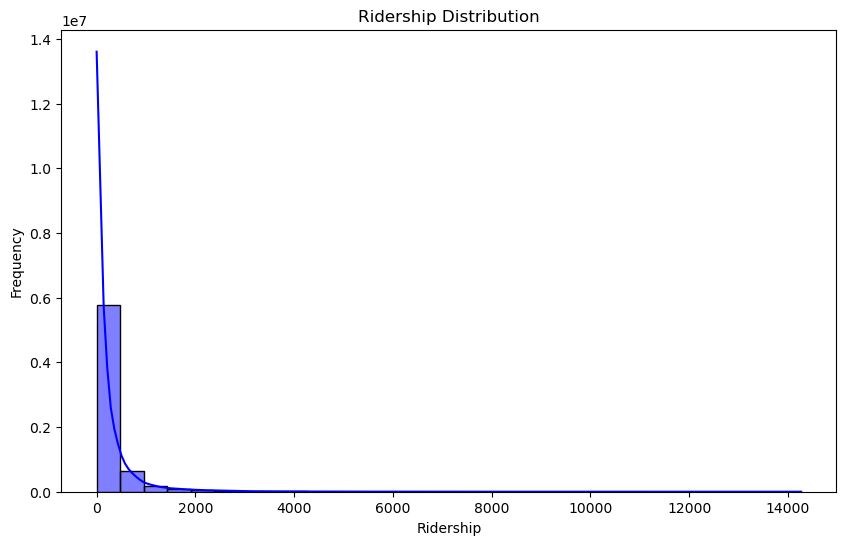

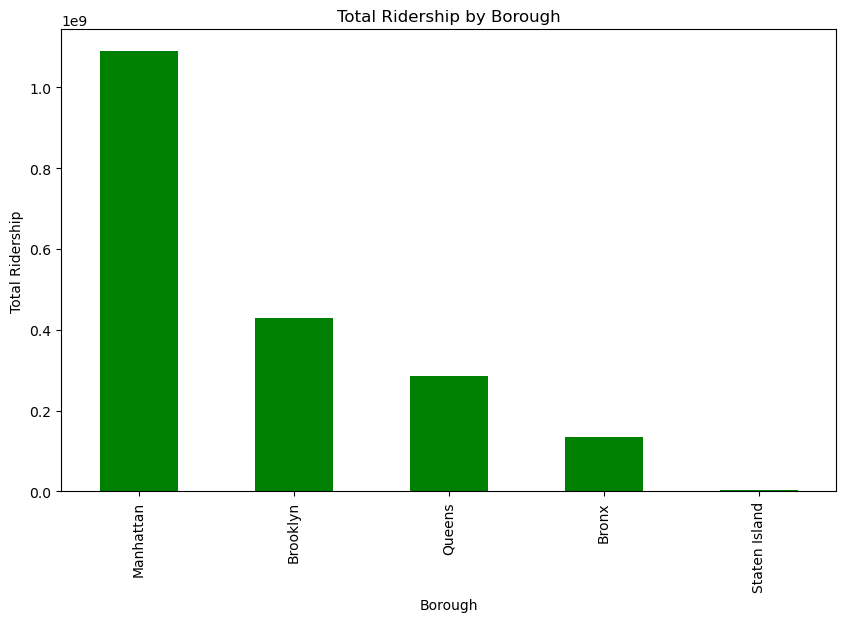

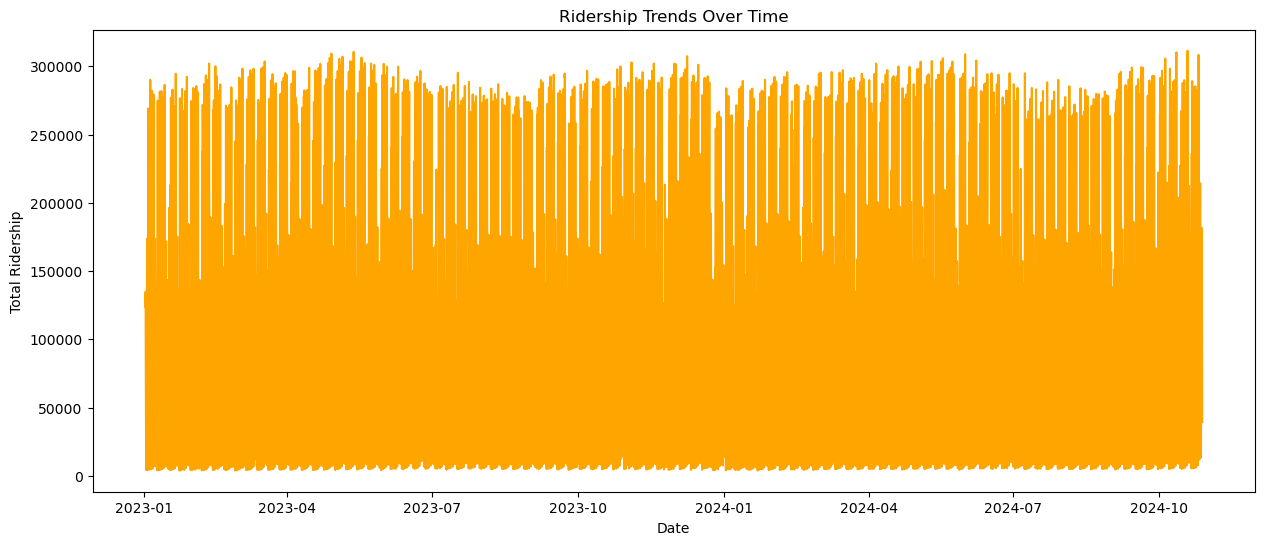

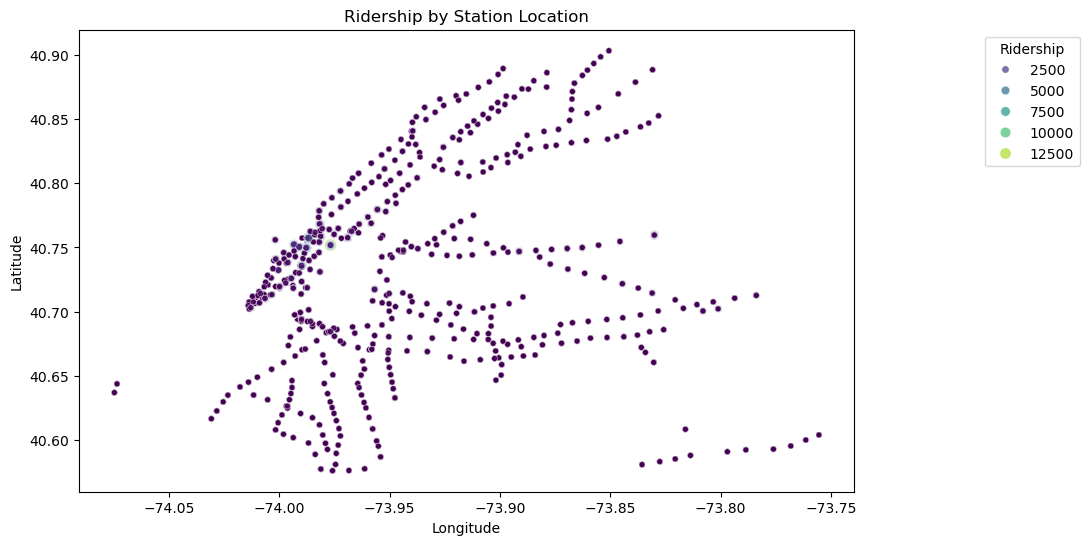

/var/folders/83/ldtf8w192czf5kcxk4c32mb80000gn/T/ipykernel_27132/2784872722.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekend', y='ridership', data=df, palette='Set2')


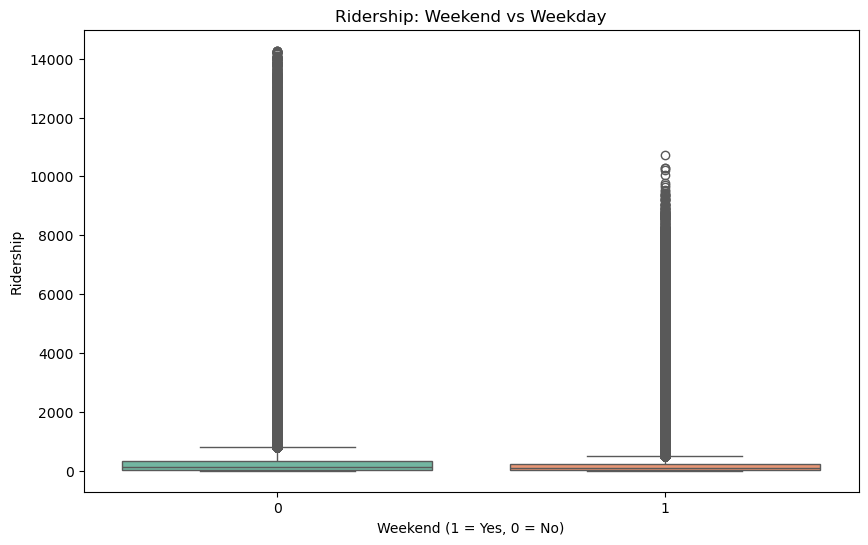

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'your_dataset.csv' with the name of your dataset file

# 1. Ridership Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['ridership'], bins=30, kde=True, color='blue')
plt.title("Ridership Distribution")
plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.show()

# 2. Ridership by Borough (Bar Chart)
plt.figure(figsize=(10, 6))
borough_ridership = df.groupby('borough')['ridership'].sum().sort_values(ascending=False)
borough_ridership.plot(kind='bar', color='green')
plt.title("Total Ridership by Borough")
plt.xlabel("Borough")
plt.ylabel("Total Ridership")
plt.show()

# 3. Ridership Over Time (Line Chart)
# Ensure 'transit_timestamp' is in datetime format
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])
ridership_time = df.groupby('transit_timestamp')['ridership'].sum()
plt.figure(figsize=(15, 6))
plt.plot(ridership_time.index, ridership_time.values, color='orange')
plt.title("Ridership Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Ridership")
plt.show()

# 4. Geographic Heatmap (Scatter Plot with Ridership)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], size=df['ridership'], hue=df['ridership'], palette='viridis', alpha=0.7)
plt.title("Ridership by Station Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Ridership", loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

# 5. Weekend vs Weekday Ridership (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekend', y='ridership', data=df, palette='Set2')
plt.title("Ridership: Weekend vs Weekday")
plt.xlabel("Weekend (1 = Yes, 0 = No)")
plt.ylabel("Ridership")
plt.show()


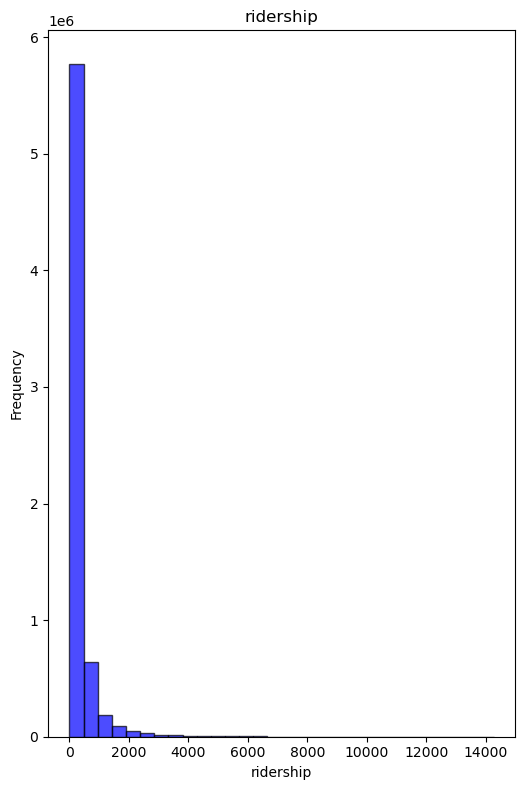

In [7]:
continuous_columns = ['ridership']  # Add more continuous columns as needed

# Number of rows and columns in the grid layout
num_columns = 3  # Adjust based on how many plots you want per row
num_rows = (len(continuous_columns) + num_columns - 1) // num_columns

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 8))
axes = axes.flatten()  # Flatten axes array for easy indexing

# Plot histograms
for i, col in enumerate(continuous_columns):
    axes[i].hist(df[col], bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots
for i in range(len(continuous_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

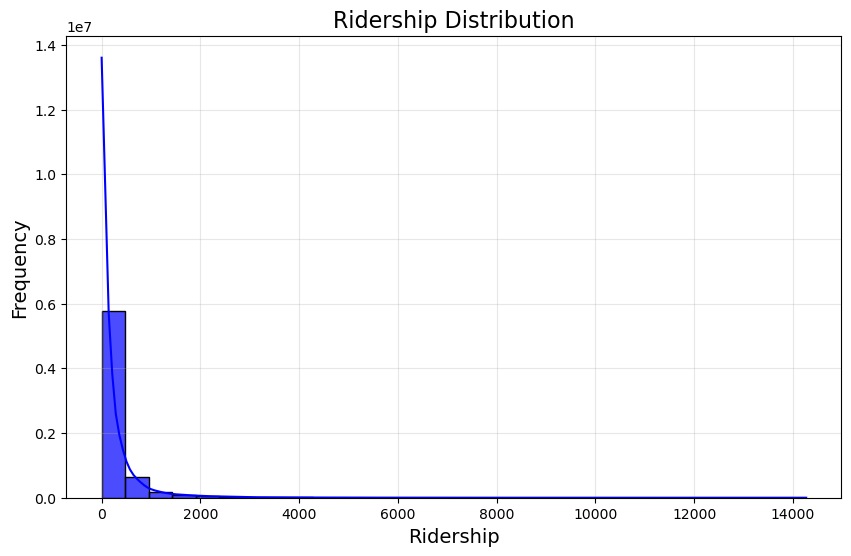

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ridership'], bins=30, kde=True, color='blue', alpha=0.7)

# Customize the plot
plt.title("Ridership Distribution", fontsize=16)
plt.xlabel("Ridership", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
mean_ridership = df['ridership'].mean()
median_ridership = df['ridership'].median()
mode_ridership = df['ridership'].mode().values[0]
skewness = df['ridership'].skew()

# Display metrics
print(f"Mean Ridership: {mean_ridership:.2f}")
print(f"Median Ridership: {median_ridership}")
print(f"Mode Ridership: {mode_ridership}")
print(f"Skewness: {skewness:.2f}")

Mean Ridership: 284.29
Median Ridership: 109.0
Mode Ridership: 1
Skewness: 6.92
